First 5 Rows
   user_id  age  annual_income  purchase_amount  loyalty_score region  \
0        1   25          45000              200            4.5  North   
1        2   34          55000              350            7.0  South   
2        3   45          65000              500            8.0   West   
3        4   22          30000              150            3.0   East   
4        5   29          47000              220            4.8  North   

   purchase_frequency  
0                  12  
1                  18  
2                  22  
3                  10  
4                  13  

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int

/tmp/ipykernel_13604/3917052052.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='region', ax=axes[2, 1], palette='viridis')


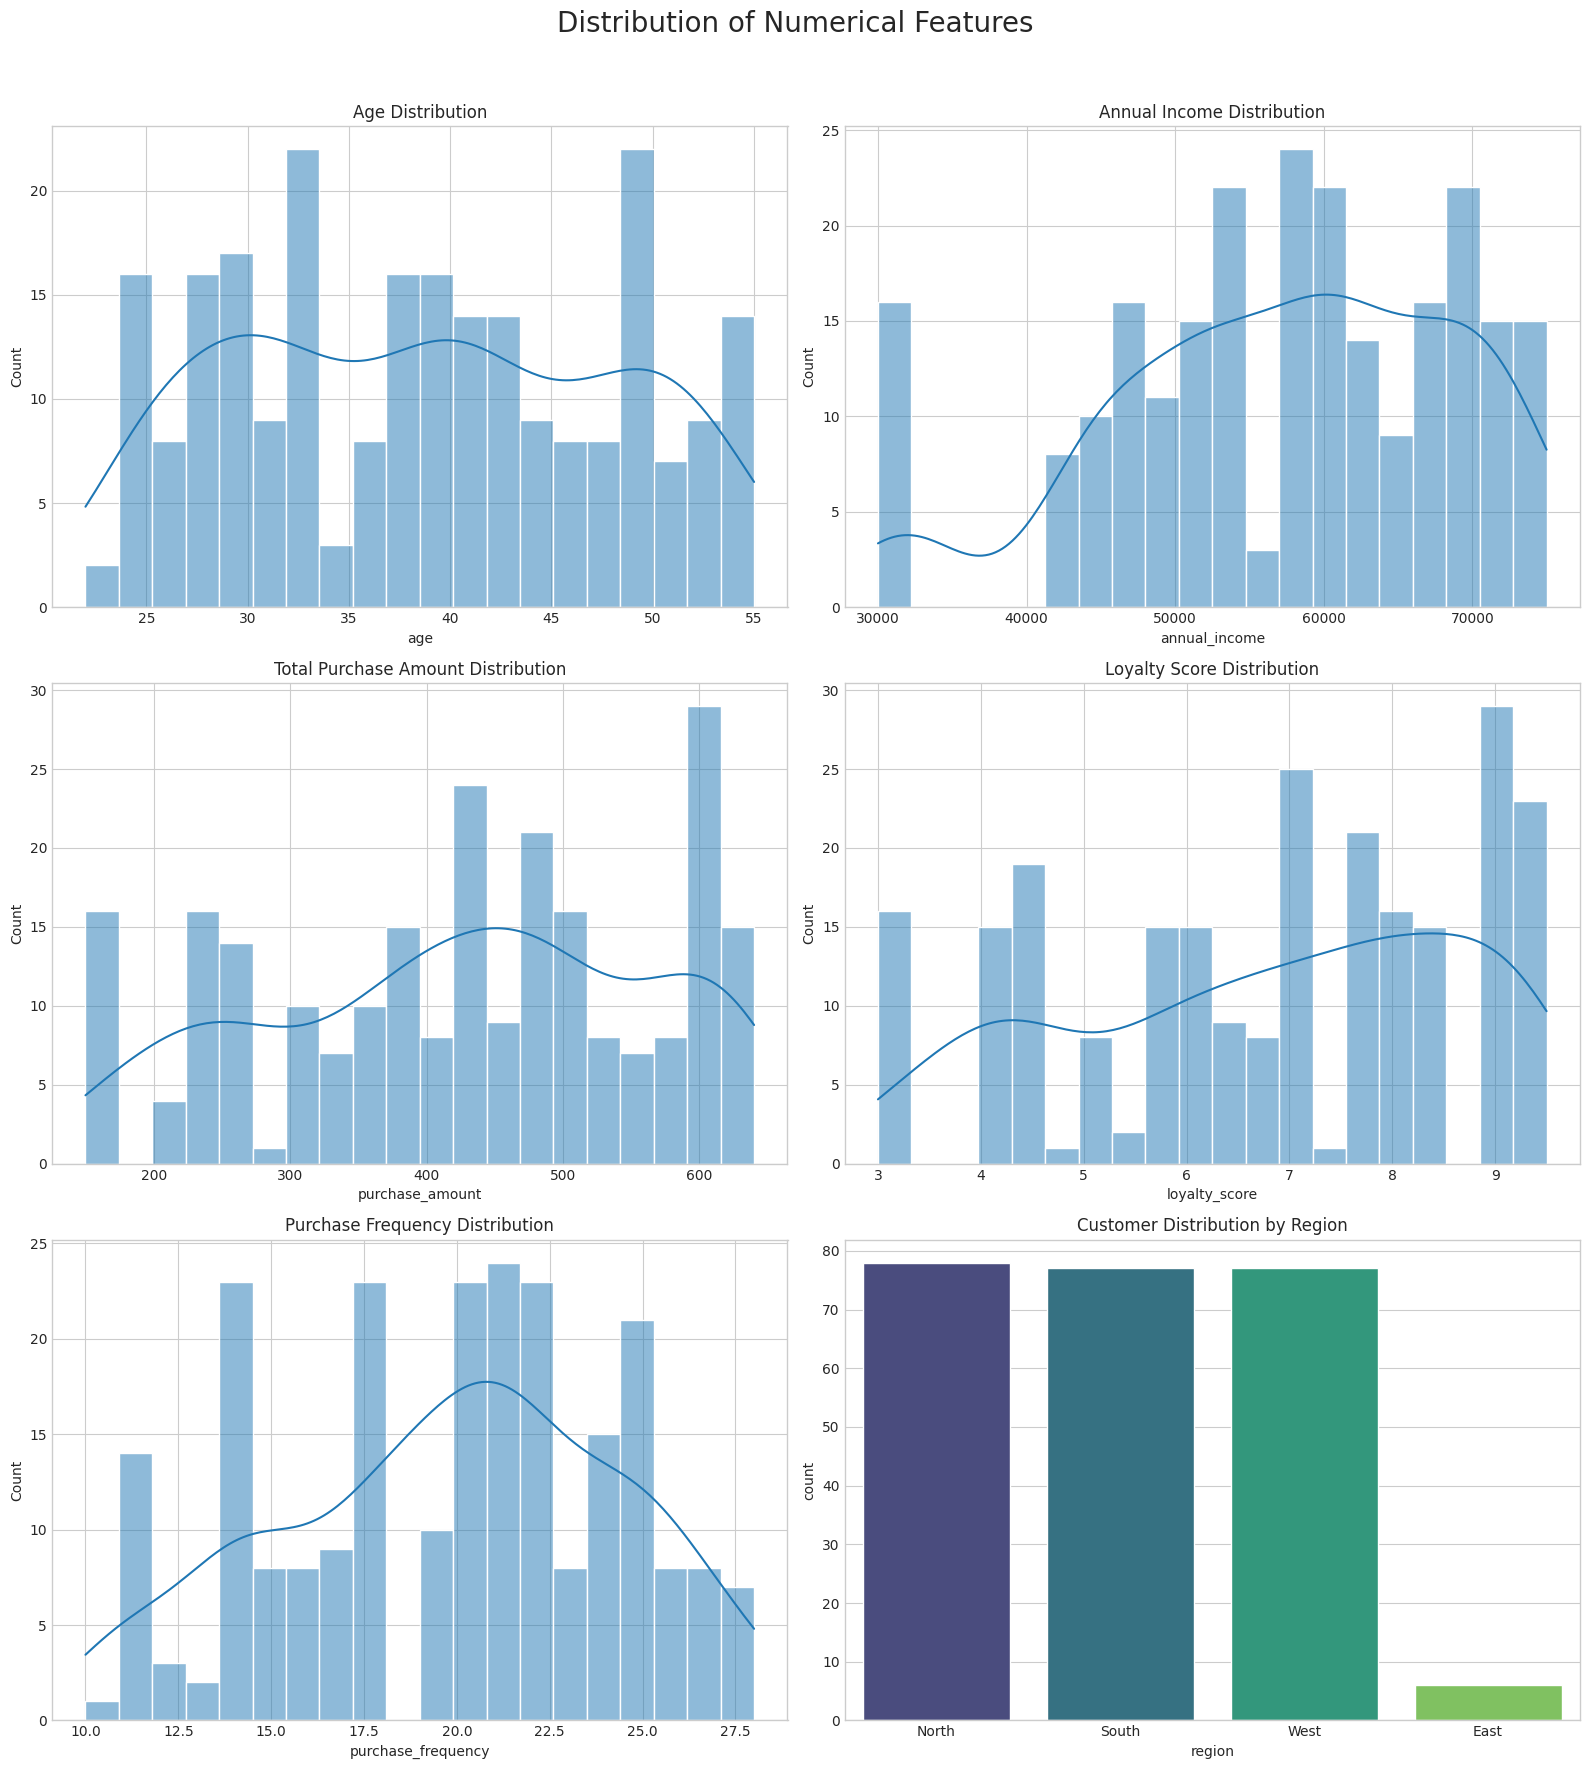

In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import dataset from spreadsheet
df = pd.read_csv('/home/labber/dsi/week15-16/customer_purchasing_behaviour/src/data/Customer_Purchasing_Behaviors.csv')

df

# set visulization style
sns.set_style(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

print("First 5 Rows")
print(df.head())
print("\nData Info")
df.info()

print("\nMissing Values")
print(df.isnull().sum())

print("\nStatistical Summary")
print(df.describe())

# Create a figure for subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Distribution of Numerical Features', fontsize=20)

# Age Distribution
sns.histplot(df['age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Annual Income Distribution
sns.histplot(df['annual_income'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Annual Income Distribution')

# Purchase Amount Distribution
sns.histplot(df['purchase_amount'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Total Purchase Amount Distribution')

# Loyalty Score Distribution
sns.histplot(df['loyalty_score'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Loyalty Score Distribution')

# Purchase Frequency Distribution
sns.histplot(df['purchase_frequency'], bins=20, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Purchase Frequency Distribution')

# Regional Distribution
sns.countplot(data=df, x='region', ax=axes[2, 1], palette='viridis')
axes[2, 1].set_title('Customer Distribution by Region')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Initial observations:
-East region heavily under represented
-no data for incomes ~$32-42K

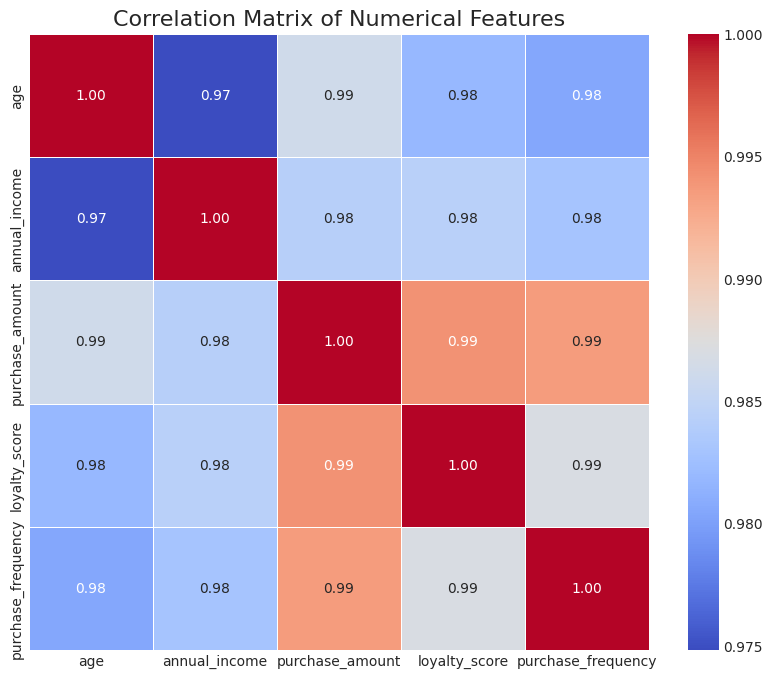

In [10]:
# Calculate the correlation matrix
corr_matrix = df.drop(['user_id', 'region'], axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

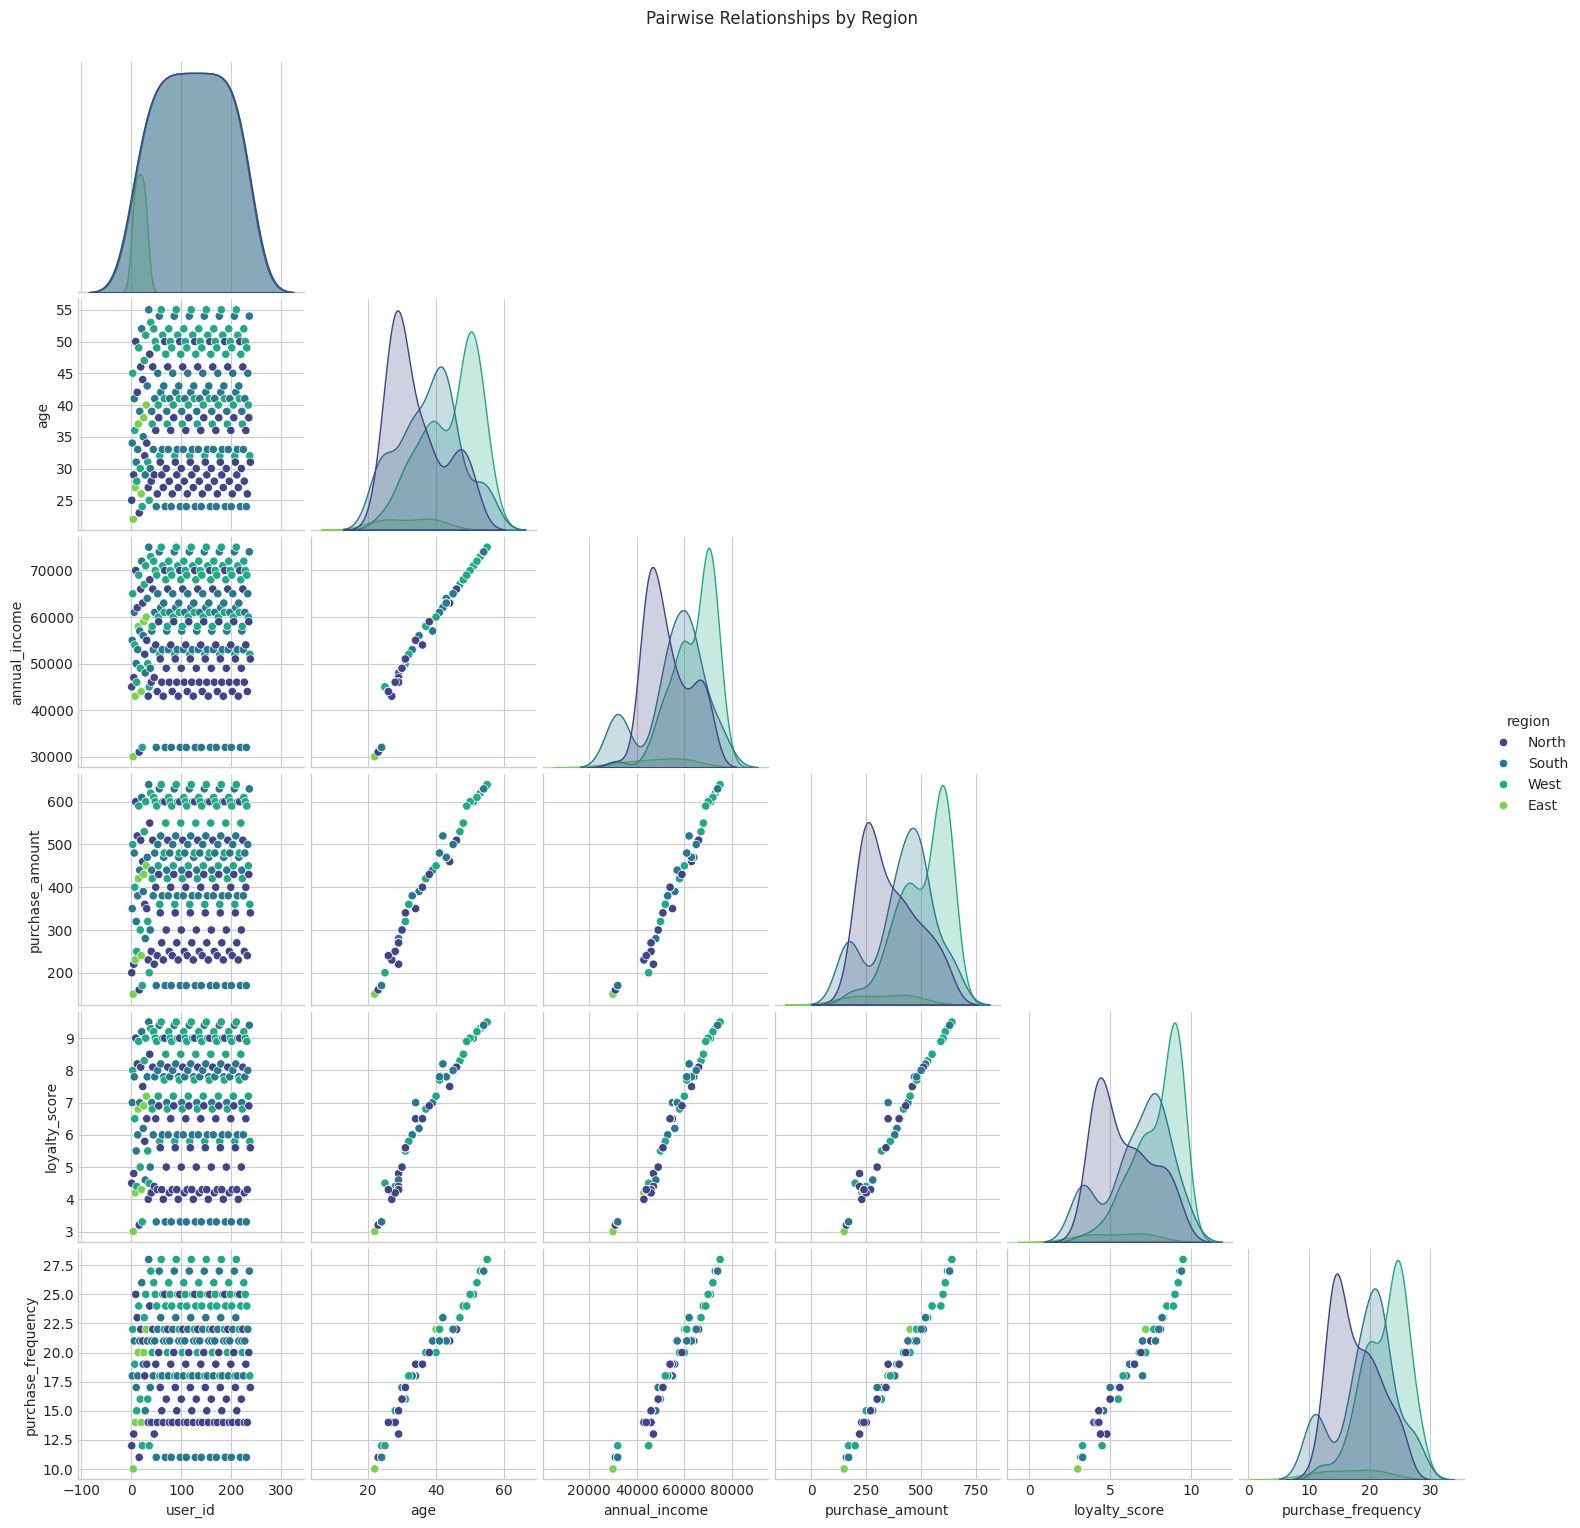

In [14]:
# Pairplot to see all bivariate relationships
# We use a sample to make it render faster if needed, but 238 rows is fine.
pair_plot = sns.pairplot(df, hue='region', palette='viridis', corner=True)
pair_plot.fig.suptitle('Pairwise Relationships by Region', y=1.02)
plt.show()